In [1]:
import numpy as np 
import pandas as pd
import matplotlib

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df = df.drop(['availability','society'], axis =1)

In [5]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df.isna().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
# df['bath'].isna()
df = df.dropna(subset=['bath'])

In [8]:
df.isna().sum()

area_type       0
location        1
size            0
total_sqft      0
bath            0
balcony       536
price           0
dtype: int64

In [9]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [10]:
df[df['location']=='Richards Town']

,area_type,location,size,total_sqft,bath,balcony,price
4607,Built-up Area,Richards Town,3 BHK,1550,3.0,2.0,160.0
5020,Super built-up Area,Richards Town,4 BHK,3600,4.0,3.0,450.0
5618,Super built-up Area,Richards Town,3 BHK,1800,3.0,0.0,230.0
7963,Super built-up Area,Richards Town,2 BHK,800,2.0,1.0,85.0
8722,Built-up Area,Richards Town,2 BHK,1050,2.0,2.0,65.0
12589,Built-up Area,Richards Town,2 BHK,1100,2.0,1.0,90.0
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.0


In [11]:
df = df.dropna(subset=['balcony'])

In [12]:
df.isnull().sum()

area_type     0
location      1
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [15]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [16]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2310
Carpet  Area              82
Plot  Area              1837
Super built-up  Area    8481
Name: area_type, dtype: int64

In [17]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [18]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [19]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [20]:
df = df.drop('size',axis = 1)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df[~df['total_sqft'].apply(is_float)]

,area_type,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [22]:
def convert_range(x):
    tokens = x.split('-')
    if tokens == 2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
df_new = df.copy()

In [24]:
df_new['total_sqft'] = df_new['total_sqft'].apply(convert_range)

In [25]:
df_new[~df_new['total_sqft'].apply(is_float)]

,area_type,location,total_sqft,bath,balcony,price,bhk


In [26]:
df_new.isna().sum()

area_type       0
location        0
total_sqft    186
bath            0
balcony         0
price           0
bhk             0
dtype: int64

In [27]:
df_new = df_new.dropna()

In [28]:
df_new.isna().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [29]:
df_new['price_per_sqft'] = df_new['price']*100000/df_new['total_sqft']

In [30]:
df_new.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [31]:
df_new['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [32]:
df_new.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
singapura paradise      1
t.c palya               1
tc.palya                4
vinayakanagar           1
whitefiled              1
Name: location, Length: 1259, dtype: int64

In [33]:
location_stats = df_new.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              498
Sarjapur  Road          366
Electronic City         300
Kanakpura Road          255
Thanisandra             220
                       ... 
Kalasipalya               1
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
whitefiled                1
Name: location, Length: 1259, dtype: int64

In [34]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [35]:
df_new.location =  df_new.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df_new.location.unique())

235

In [36]:
df_new.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Marathahalli',
       '7th Phase JP Nagar', 'Gottigere', 'Sarjapur', 'Mysore Road',
       'Bisuvanahalli', 'Raja Rajeshwari Nagar', 'other', 'Kengeri',
       'Binny Pete', 'Thanisandra', 'Bellandur', 'Electronic City',
       'Ramagondanahalli', 'Hebbal', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Sarjapur  Road', 'Yelahanka', 'Doddathoguru', 'KR Puram',
       'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Murugeshpalya', 'Varthur', 'Bommanahalli', 'Gunjur',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Rajaji Nagar', 'Sanjay nagar', 'Domlur',
       'Sarjapura - Attibele Road', 'Yeshwanthpur', 'Chandapura',
       'Nagarbhavi', 'Devanaha

In [37]:
df_new[df_new['location'] == 'other']

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
18,Super built-up Area,other,2770.0,4.0,2.0,290.00,3,10469.314079
19,Super built-up Area,other,1100.0,2.0,2.0,48.00,2,4363.636364
24,Super built-up Area,other,510.0,1.0,0.0,25.25,1,4950.980392
25,Super built-up Area,other,1250.0,3.0,2.0,56.00,3,4480.000000
42,Super built-up Area,other,600.0,1.0,0.0,38.00,1,6333.333333
...,...,...,...,...,...,...,...,...
13278,Built-up Area,other,1256.0,2.0,1.0,65.00,2,5175.159236
13285,Super built-up Area,other,1353.0,2.0,2.0,110.00,2,8130.081301
13291,Plot Area,other,812.0,1.0,0.0,26.00,1,3201.970443
13292,Super built-up Area,other,1440.0,2.0,2.0,63.93,3,4439.583333


In [38]:
len(df_new[df_new.total_sqft/df_new.bhk<300])

655

In [39]:
df_new = df_new[~(df_new.total_sqft/df_new.bhk<300)]

In [40]:
df_new.shape

(11869, 8)

In [41]:
df_new.price_per_sqft.describe()

count     11869.000000
mean       6220.296579
std        4004.343212
min         267.829813
25%        4198.473282
50%        5263.157895
75%        6844.741235
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df_new = remove_pps_outliers(df_new)
df_new.shape

(9760, 8)

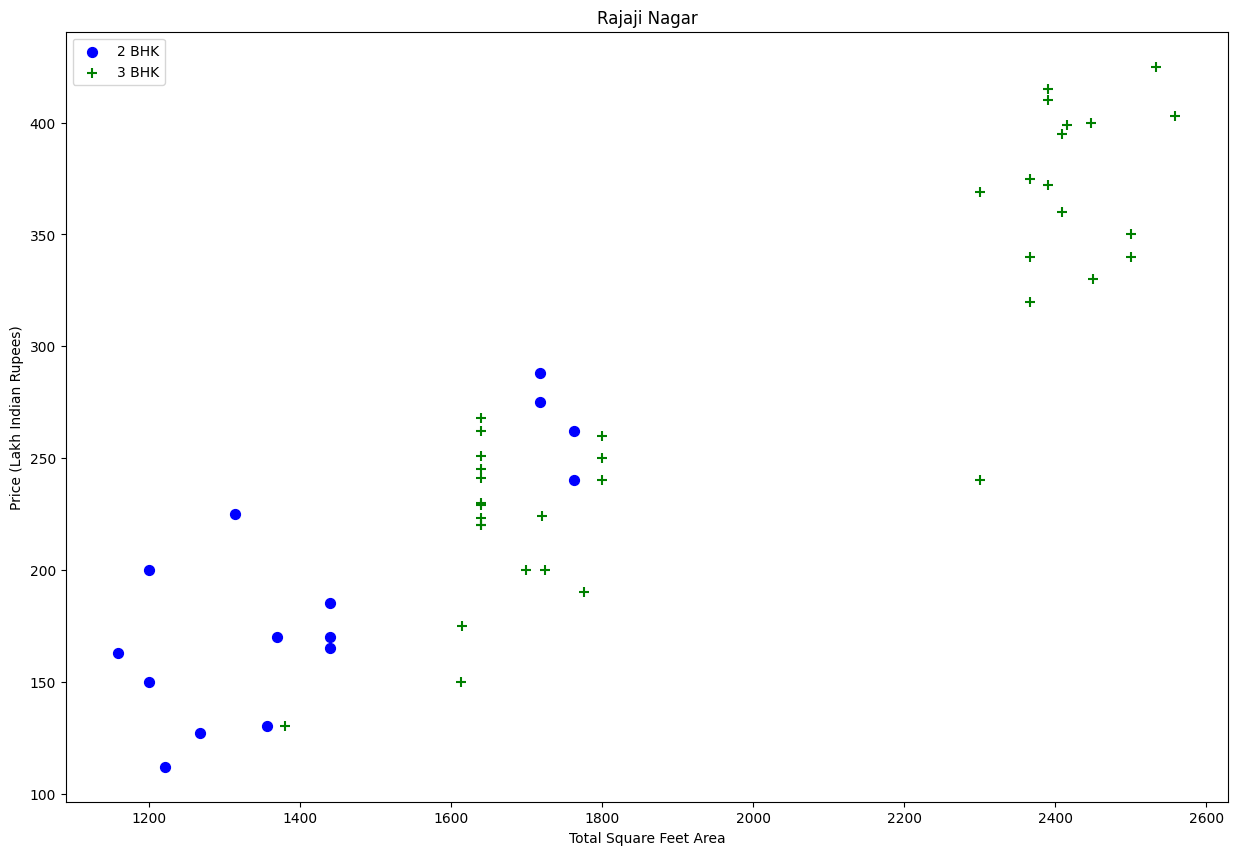

In [45]:
import matplotlib.pyplot as plt
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df_new,"Rajaji Nagar")

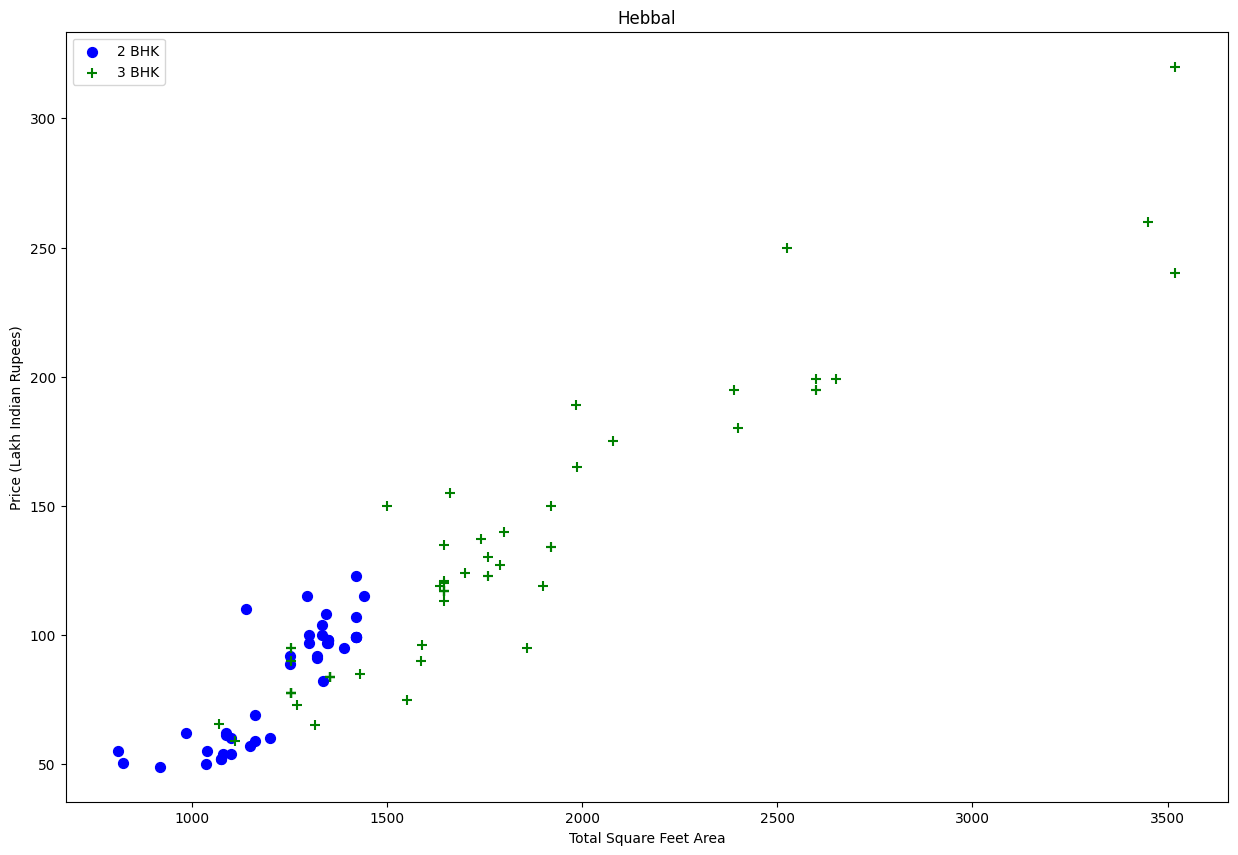

In [46]:
plot_scatter_chart(df_new,"Hebbal")

In [47]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df_new = remove_bhk_outliers(df_new)
df_new.shape

(6915, 8)

Text(0, 0.5, 'Count')

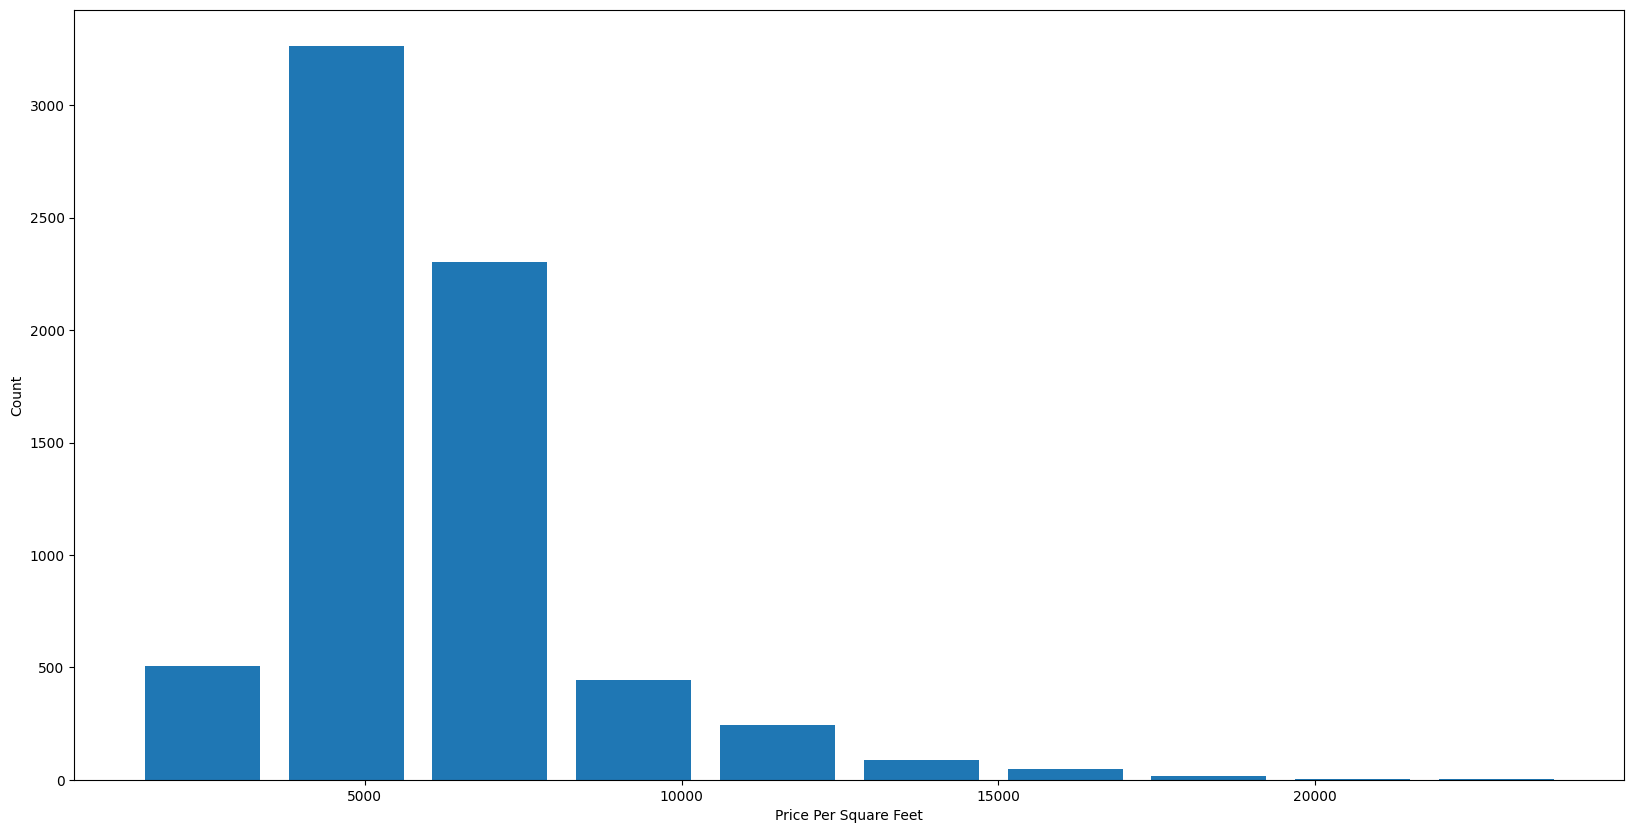

In [48]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df_new.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [49]:
df_new.bath.unique()

array([ 2.,  3.,  4.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

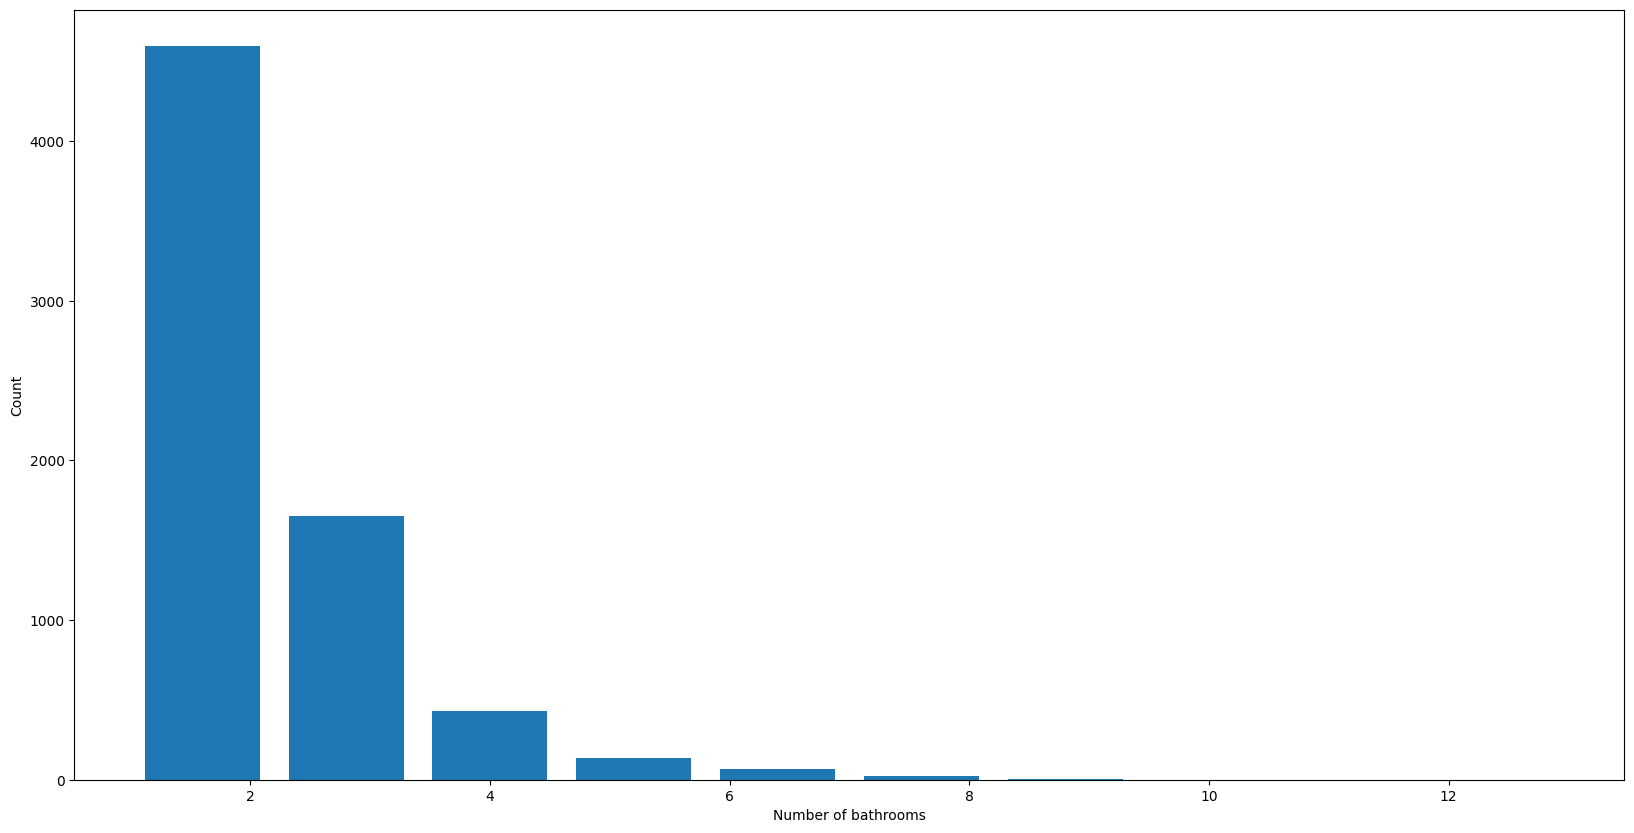

In [50]:
plt.hist(df_new.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [51]:
df_new[df_new.bath>10]

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9172,Super built-up Area,other,5425.0,13.0,0.0,275.0,13,5069.124424


In [52]:
df_new[df_new.bath>df_new.bhk+2]

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1535,Built-up Area,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6363,Super built-up Area,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
7979,Super built-up Area,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [53]:
df_new = df_new[df_new.bath<df_new.bhk+2]
df_new.shape

(6853, 8)

In [54]:
df_new = df_new.drop('price_per_sqft',axis=1)

In [55]:
df_new

,area_type,location,total_sqft,bath,balcony,price,bhk
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Plot Area,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Super built-up Area,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
5,Super built-up Area,Devarachikkanahalli,947.0,2.0,2.0,43.0,2
...,...,...,...,...,...,...,...
9750,Super built-up Area,other,1155.0,2.0,1.0,64.0,2
9752,Carpet Area,other,1200.0,2.0,3.0,70.0,2
9753,Super built-up Area,other,1800.0,1.0,1.0,200.0,1
9756,Super built-up Area,other,1353.0,2.0,2.0,110.0,2


In [56]:
pd.get_dummies(df_new.location)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9752,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9753,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9756,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [57]:
df_new

,area_type,location,total_sqft,bath,balcony,price,bhk
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Plot Area,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Super built-up Area,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
5,Super built-up Area,Devarachikkanahalli,947.0,2.0,2.0,43.0,2
...,...,...,...,...,...,...,...
9750,Super built-up Area,other,1155.0,2.0,1.0,64.0,2
9752,Carpet Area,other,1200.0,2.0,3.0,70.0,2
9753,Super built-up Area,other,1800.0,1.0,1.0,200.0,1
9756,Super built-up Area,other,1353.0,2.0,2.0,110.0,2


In [58]:
df_new = pd.concat([df_new,pd.get_dummies(df_new.location,drop_first=True).astype(int) ],axis=1)

In [59]:
df_new

,area_type,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Plot Area,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Super built-up Area,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,Super built-up Area,other,1155.0,2.0,1.0,64.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9752,Carpet Area,other,1200.0,2.0,3.0,70.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9753,Super built-up Area,other,1800.0,1.0,1.0,200.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9756,Super built-up Area,other,1353.0,2.0,2.0,110.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
df_new = df_new.drop('location',axis=1)

In [61]:
df_new

,area_type,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,Super built-up Area,1250.0,2.0,2.0,40.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Plot Area,1200.0,2.0,2.0,83.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,1170.0,2.0,2.0,40.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1425.0,2.0,2.0,65.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Super built-up Area,947.0,2.0,2.0,43.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,Super built-up Area,1155.0,2.0,1.0,64.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9752,Carpet Area,1200.0,2.0,3.0,70.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9753,Super built-up Area,1800.0,1.0,1.0,200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9756,Super built-up Area,1353.0,2.0,2.0,110.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
df_new = pd.concat([df_new,pd.get_dummies(df_new.area_type,drop_first=True).astype(int) ],axis=1)
df_new = df_new.drop('area_type',axis=1)
df_new

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Carpet Area,Plot Area,Super built-up Area
1,1250.0,2.0,2.0,40.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1200.0,2.0,2.0,83.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1170.0,2.0,2.0,40.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1425.0,2.0,2.0,65.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,947.0,2.0,2.0,43.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,1155.0,2.0,1.0,64.0,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9752,1200.0,2.0,3.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
9753,1800.0,1.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9756,1353.0,2.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [63]:
X = df_new.drop('price', axis=1)
X

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Carpet Area,Plot Area,Super built-up Area
1,1250.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1200.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1170.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1425.0,2.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,947.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,1155.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9752,1200.0,2.0,3.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
9753,1800.0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9756,1353.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [64]:
y = df_new['price']

In [65]:
y

1        40.0
2        83.0
3        40.0
4        65.0
5        43.0
        ...  
9750     64.0
9752     70.0
9753    200.0
9756    110.0
9757     26.0
Name: price, Length: 6853, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()

In [69]:
lrm.fit(X_train,y_train)
lrm.score(X_test,y_test)

0.8528402772531225

In [70]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.86214775, 0.77197007, 0.82340929, 0.86682595, 0.85780716])

In [71]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_paramet

,model,best_score,best_params
0,linear_regression,0.836432,{}
1,lasso,0.703111,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.772000,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [72]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lrm.predict([x])[0]

In [73]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

D:\Anaconda\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.6826963417942

In [74]:
predict_price('Indira Nagar',1000, 3, 3)

D:\Anaconda\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


165.9453327414957

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

In [76]:
y_predict = lrm.predict(X_test)
MAE = mean_absolute_error(y_test,y_predict)

In [77]:
MAE

16.67607398538083

In [78]:
RMSE = np.sqrt(mean_squared_error(y_test,y_predict))

In [79]:
RMSE

28.333148859651693

In [81]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lrm,f)

In [82]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))